In [1]:
import torch
import wandb
import os
import wandb

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

CUDA available: True


In [2]:


def plot_last_psnr_vs_labels(wandb_urls, labels, main_title="Letzte Test-PSNR-Werte"):

    if len(wandb_urls) != len(labels):
        raise ValueError("wandb_urls und labels müssen die gleiche Länge haben.")

    api = wandb.Api()
    psnr_values = []

    for url in wandb_urls:
        run = api.run(url)
        history = run.history(keys=["test_psnr"])
        
        if "test_psnr" in history.columns and not history["test_psnr"].dropna().empty:
            last_psnr = history["test_psnr"].dropna().iloc[-1]
        else:
            last_psnr = float("nan")
        psnr_values.append(last_psnr)

    plt.figure(figsize=(10, 6))
    plt.plot(labels, psnr_values, marker='o', linestyle='-')
    plt.title(main_title, fontsize=14)
    plt.xlabel("Input Image Counts", fontsize=12)
    plt.ylabel("Test PSNR", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


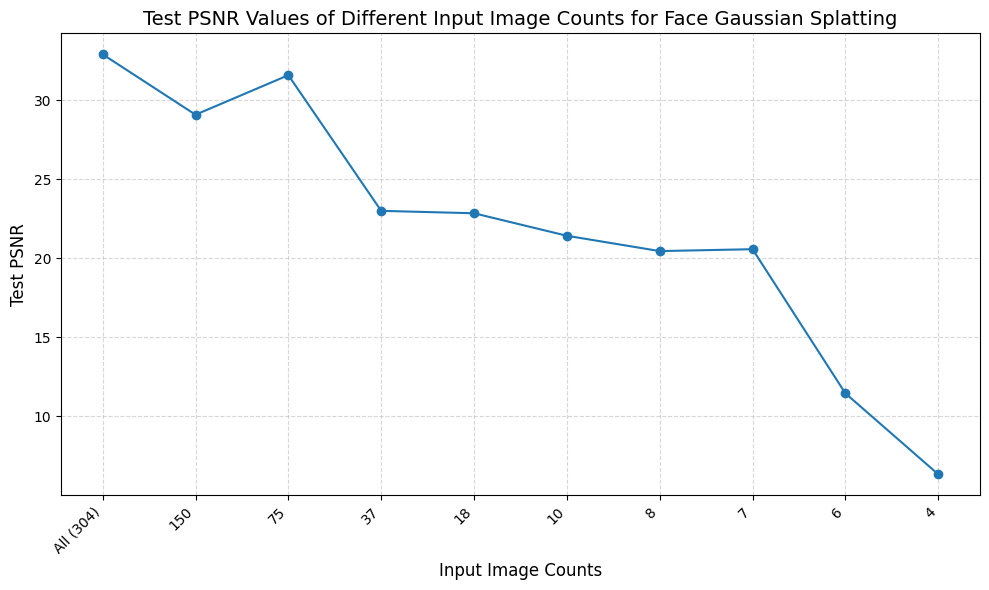

In [3]:
wandb_urls = [
    "can-b-fh/gaussian-splatting/runs/b73toy79",
    "can-b-fh/gaussian-splatting/runs/pn44ts3r",
    "can-b-fh/gaussian-splatting/runs/sv3z0r39",
    "can-b-fh/gaussian-splatting/runs/i0mt2720",
    "can-b-fh/gaussian-splatting/runs/4bkdsaz5",
    "can-b-fh/gaussian-splatting/runs/ebcy56mm",
    "can-b-fh/gaussian-splatting/runs/ca48v5wg",
    "can-b-fh/gaussian-splatting/runs/0ombttbp",
    "can-b-fh/gaussian-splatting/runs/ggyko0em",
    "can-b-fh/gaussian-splatting/runs/hddybvgj",
]
labels = ["All (304)", "150", "75", "37", "18", "10", "8", "7", "6", "4"]

plot_last_psnr_vs_labels(wandb_urls, labels, main_title="Test PSNR Values of Different Input Image Counts for Face Gaussian Splatting")


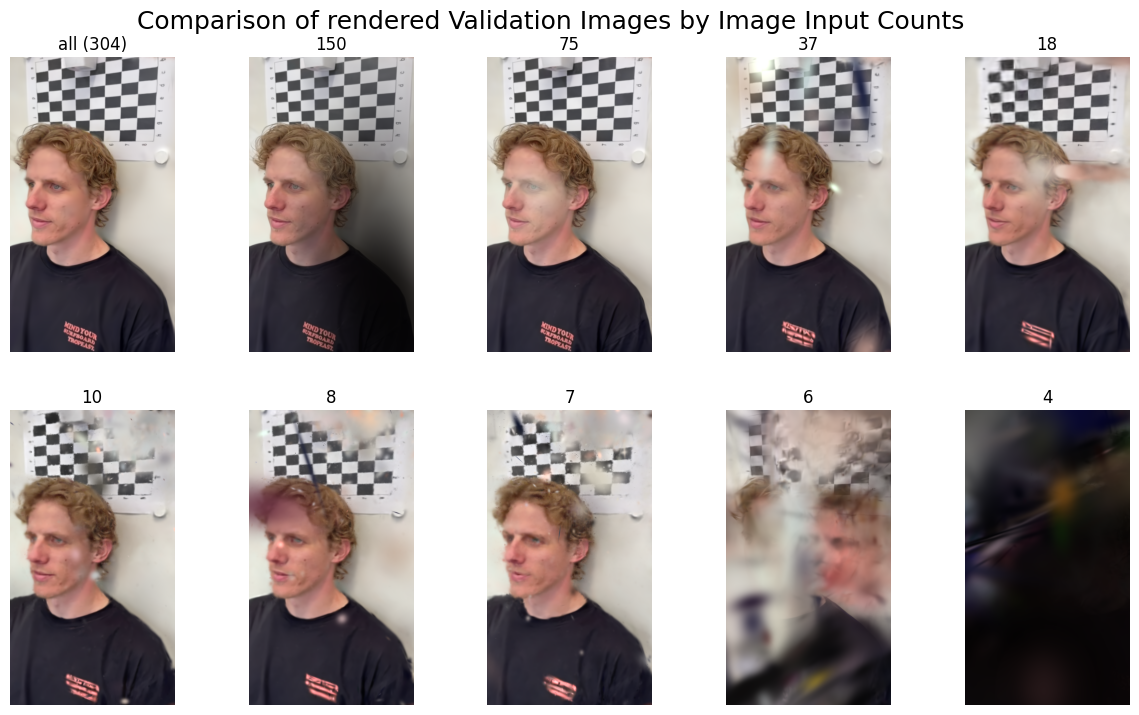

In [4]:


image_paths = [
    "../outputs/videos/jan_video_loop/all_model/test/ours_19050/renders/00000.png",
    "../outputs/videos/jan_video_loop/150_model/test/ours_13050/renders/00000.png",
    "../outputs/videos/jan_video_loop/75_model/test/ours_13000/renders/00000.png",
    "../outputs/videos/jan_video_loop/37_model/test/ours_9000/renders/00000.png",
    "../outputs/videos/jan_video_loop/18_model/test/ours_9000/renders/00000.png",
    "../outputs/videos/jan_video_loop/10_model/test/ours_7010/renders/00000.png",
    "../outputs/videos/jan_video_loop/8_model/test/ours_8225/renders/00000.png",
    "../outputs/videos/jan_video_loop/7_model/test/ours_8025/renders/00000.png",
    "../outputs/videos/jan_video_loop/6_model/test/ours_6950/renders/00000.png",
    "../outputs/videos/jan_video_loop/4_model/test/ours_6950/renders/00000.png",
]

labels = ["all (304)", "150", "75", "37", "18", "10", "8", "7", "6", "4"]

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
axs = axs.flatten()

fig.suptitle("Comparison of rendered Validation Images by Image Input Counts", fontsize=18, y=0.98)

for ax, img_path, lbl in zip(axs, image_paths, labels):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(lbl, fontsize=12)
    ax.axis('off')

plt.subplots_adjust(wspace=0.15, hspace=0.2, top=0.92)

plt.show()


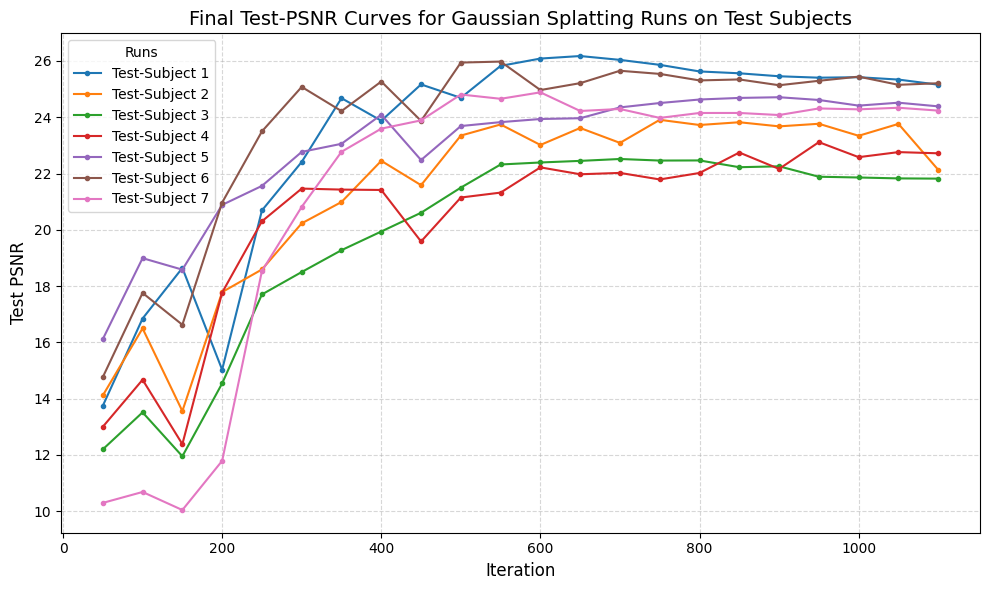

In [5]:


def plot_psnr_curves(wandb_urls, labels, main_title="Test-PSNR über Iterationen"):

    if len(wandb_urls) != len(labels):
        raise ValueError("wandb_urls und labels müssen die gleiche Länge haben.")

    api = wandb.Api()
    
    plt.figure(figsize=(10, 6))

    for url, label in zip(wandb_urls, labels):
        run = api.run(url)
        history = run.history(keys=["test_psnr", "_step"])
        
        if "test_psnr" not in history.columns or history["test_psnr"].dropna().empty:
            print(f"Warning: Keine PSNR-Daten in {url}")
            continue
        
        psnr = history["test_psnr"].dropna()
        steps = history["_step"].loc[psnr.index] if "_step" in history.columns else psnr.index
        
        plt.plot(steps, psnr, marker='.', linestyle='-', label=label)

    plt.title(main_title, fontsize=14)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Test PSNR", fontsize=12)
    plt.legend(title="Runs")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

wandb_urls = [
    "can-b-fh/gaussian-splatting/runs/38mjc3ce",
    "can-b-fh/gaussian-splatting/runs/m8g7dbgk",
    "can-b-fh/gaussian-splatting/runs/v34b5ws7",
    "can-b-fh/gaussian-splatting/runs/w5rk2mva",
    "can-b-fh/gaussian-splatting/runs/16mbxvyu",
    "can-b-fh/gaussian-splatting/runs/r9raguwl",
    "can-b-fh/gaussian-splatting/runs/olxjsfbv",
]
labels = [
    "Test-Subject 1",
    "Test-Subject 2",
    "Test-Subject 3",
    "Test-Subject 4",
    "Test-Subject 5",
    "Test-Subject 6",
    "Test-Subject 7",
]

plot_psnr_curves(
    wandb_urls,
    labels,
    main_title="Final Test-PSNR Curves for Gaussian Splatting Runs on Test Subjects"
)


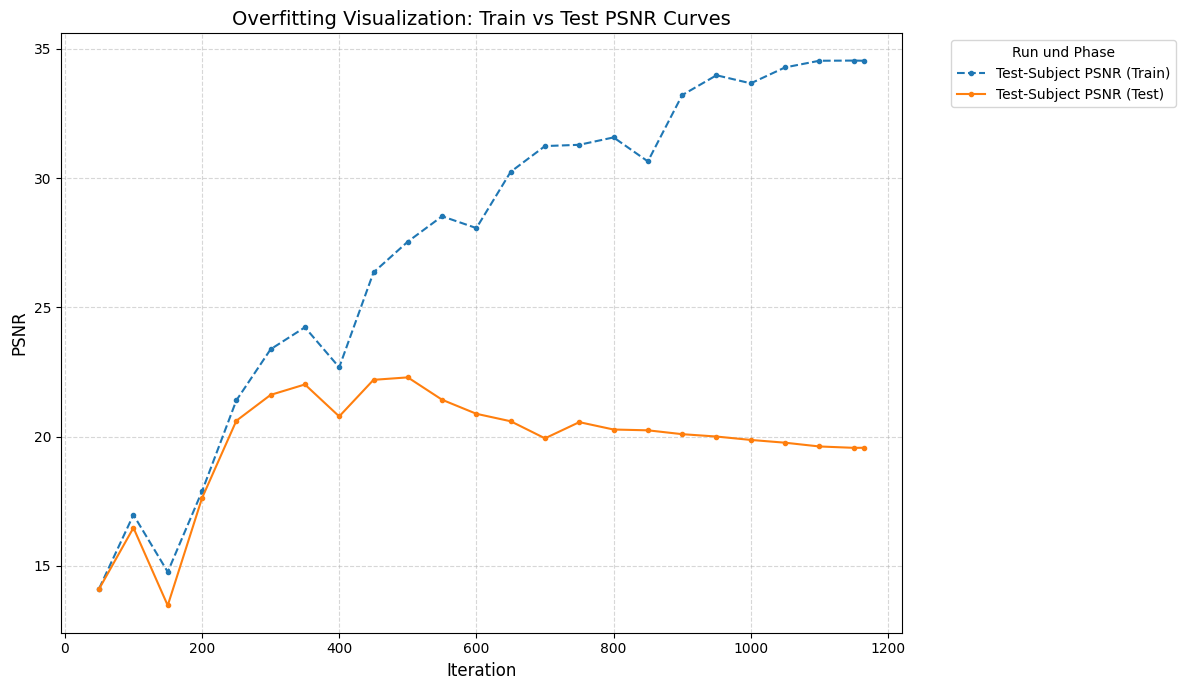

In [6]:


def plot_train_test_psnr_curves(wandb_urls, labels, main_title="Train- und Test-PSNR über Iterationen"):

    if len(wandb_urls) != len(labels):
        raise ValueError("wandb_urls und labels müssen die gleiche Länge haben.")

    api = wandb.Api()
    plt.figure(figsize=(12, 7))

    for url, label in zip(wandb_urls, labels):
        run = api.run(url)
        history = run.history(keys=["train_psnr", "test_psnr", "_step"])

        for key, style in [("train_psnr", "--"), ("test_psnr", "-")]:
            if key in history.columns and not history[key].dropna().empty:
                values = history[key].dropna()
                steps = history["_step"].loc[values.index] if "_step" in history.columns else values.index
                plt.plot(steps, values, linestyle=style, marker='.', label=f"{label} ({'Train' if key=='train_psnr' else 'Test'})")

    plt.title(main_title, fontsize=14)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("PSNR", fontsize=12)
    plt.legend(title="Run und Phase", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


wandb_urls = [
    "can-b-fh/gaussian-splatting/runs/46f3wyvf",
]
labels = [
    "Test-Subject PSNR",
]

plot_train_test_psnr_curves(
    wandb_urls,
    labels,
    main_title="Overfitting Visualization: Train vs Test PSNR Curves"
)